<div style="text-align: center; font-size: 21px; font-weight: bold; text-decoration: underline;">
    Prediction of future Amazon.com stock prices using Machine Learning algorithms
</div>

Contributors:
- Wiktoria Sarabon
- Martyna Szawłowska
- Magdalena Lamczyk
- Jakub Galikowski
- Natalia Szczepkowska

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data overview

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume,Year,infl_USA,infl_EU,infl_World,Revenue_Billions
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1.443120e+09,410.994995,414.295013,409.625000,414.200012,9.163600e+08,1997.0,2.34,3.11,5.57,0.064587
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,2.940000e+08,414.200012,414.200012,406.279999,406.279999,9.735600e+08,1997.0,2.34,3.11,5.57,0.064948
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,1.221360e+08,406.279999,410.350006,406.279999,409.230011,6.902800e+08,1997.0,2.34,3.11,5.57,0.066034
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,1.093440e+08,409.230011,414.480011,405.890015,414.160004,9.017000e+08,1997.0,2.34,3.11,5.57,0.066395
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,3.770640e+08,414.160004,416.739990,411.035004,413.140015,1.081460e+09,1997.0,2.34,3.11,5.57,0.066757


The dataset contains the following 16 columns:
- **Date**
- **AMZN_Open**: The price at which the Amazon.com stock first traded upon the opening of the market (in USD),
- **AMZN_High**: The highest price at which the Amazon.com stock traded during the trading day (in USD),
- **AMZN_Low**: The lowest price at which the Amazon.com stock traded during the trading day (in USD),
- **AMZN_Close**: The price at which the Amazon.com stock last traded upon the closing of the market (in USD),
- **AMZN_Volume**: The total number of Amazon.com shares traded during the trading day (in USD),
- **sp100_Open**: The collective starting point of the stocks within the S&P 100 index (in USD),
- **sp100_High**: The peak level of the S&P 100 index's performance throughout the trading session (in USD),
- **sp100_Low**: The lowest point of the S&P 100 index's performance during the trading session (in USD),
- **sp100_Close**: The collective ending point of the stocks within the S&P 100 index (in USD),
- **sp100_Volume**: The overall level of activity and trading interest in the stocks comprising the S&P 100 index (in USD),
- **Inflation_USA**: Annual mean inflation rate in the USA (in %)
- **Inflation_UE**: Annual mean inflation rate in the European Union (in %)
- **Inflation_World**: Annual mean inflation rate in the world (in %)
- **Revenue_Billions**: Amazon.com revenue (in billions USD)

In [3]:
# info o danych, podstawowe statystyki

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              6709 non-null   object 
 1   AMZN_Open         6701 non-null   float64
 2   AMZN_High         6701 non-null   float64
 3   AMZN_Low          6701 non-null   float64
 4   AMZN_Close        6701 non-null   float64
 5   AMZN_Volume       6701 non-null   float64
 6   sp100_Open        6701 non-null   float64
 7   sp100_High        6701 non-null   float64
 8   sp100_Low         6701 non-null   float64
 9   sp100_Close       6701 non-null   float64
 10  sp100_Volume      6701 non-null   float64
 11  Year              6701 non-null   float64
 12  infl_USA          6701 non-null   float64
 13  infl_EU           6701 non-null   float64
 14  infl_World        6701 non-null   float64
 15  Revenue_Billions  6709 non-null   float64
dtypes: float64(15), object(1)
memory usage: 83

In [5]:
# Date -> zmienna kategoryczna
# pozostałe zmienne -> numeryczne
# czy Year powinno byc kategoryczne?

# podział nazw kolumn na kategoryczne i numeryczne
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Date'], dtype='object')
Numerical Variables:
['AMZN_Open', 'AMZN_High', 'AMZN_Low', 'AMZN_Close', 'AMZN_Volume', 'sp100_Open', 'sp100_High', 'sp100_Low', 'sp100_Close', 'sp100_Volume', 'Year', 'infl_USA', 'infl_EU', 'infl_World', 'Revenue_Billions']


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AMZN_Open,6701.0,3.432438e+01,5.013650e+01,7.031300e-02,2.043000e+00,7.244000e+00,4.723750e+01,1.872000e+02
AMZN_High,6701.0,3.473663e+01,5.072325e+01,7.239600e-02,2.081500e+00,7.354500e+00,4.745250e+01,1.886540e+02
AMZN_Low,6701.0,3.387753e+01,4.949330e+01,6.562500e-02,1.998500e+00,7.176000e+00,4.658750e+01,1.848395e+02
AMZN_Close,6701.0,3.431570e+01,5.011010e+01,6.979200e-02,2.044500e+00,7.272500e+00,4.698950e+01,1.865705e+02
AMZN_Volume,6701.0,1.401413e+08,1.389811e+08,9.744000e+06,6.695890e+07,1.037740e+08,1.585660e+08,2.086584e+09
sp100_Open,6701.0,8.739697e+02,4.635779e+02,3.234700e+02,5.574700e+02,6.739700e+02,1.056800e+03,2.245220e+03
sp100_High,6701.0,8.794646e+02,4.660805e+02,3.309700e+02,5.608200e+02,6.790800e+02,1.059260e+03,2.248570e+03
sp100_Low,6701.0,8.681988e+02,4.610202e+02,3.173700e+02,5.535400e+02,6.687100e+02,1.054040e+03,2.241210e+03
sp100_Close,6701.0,8.741433e+02,4.637173e+02,3.221300e+02,5.575100e+02,6.741000e+02,1.056840e+03,2.242440e+03
sp100_Volume,6701.0,3.075967e+09,1.623774e+09,1.549000e+08,1.488800e+09,3.295600e+09,4.060340e+09,1.145623e+10


In [7]:
# number of unique values
data.nunique()

Date                6709
AMZN_Open           5967
AMZN_High           5926
AMZN_Low            5932
AMZN_Close          6067
AMZN_Volume         6508
sp100_Open          6429
sp100_High          6371
sp100_Low           6411
sp100_Close         6417
sp100_Volume        6510
Year                  27
infl_USA              27
infl_EU               26
infl_World            26
Revenue_Billions    6709
dtype: int64

In [8]:
# number of missing records in each column
data.isnull().sum()

Date                0
AMZN_Open           8
AMZN_High           8
AMZN_Low            8
AMZN_Close          8
AMZN_Volume         8
sp100_Open          8
sp100_High          8
sp100_Low           8
sp100_Close         8
sp100_Volume        8
Year                8
infl_USA            8
infl_EU             8
infl_World          8
Revenue_Billions    0
dtype: int64

In [9]:
# percentage of missing values in each column
(data.isnull().sum()/(len(data)))*100

Date                0.000000
AMZN_Open           0.119243
AMZN_High           0.119243
AMZN_Low            0.119243
AMZN_Close          0.119243
AMZN_Volume         0.119243
sp100_Open          0.119243
sp100_High          0.119243
sp100_Low           0.119243
sp100_Close         0.119243
sp100_Volume        0.119243
Year                0.119243
infl_USA            0.119243
infl_EU             0.119243
infl_World          0.119243
Revenue_Billions    0.000000
dtype: float64

Each 14 of the 16 columns has approximately 0.12% missing values.

## Exploratory Data Analysis

In [10]:
# wykresy: pairplot, heatmap, wykresy sp100_close i amzn_close w czasie itp.

### Pairplot

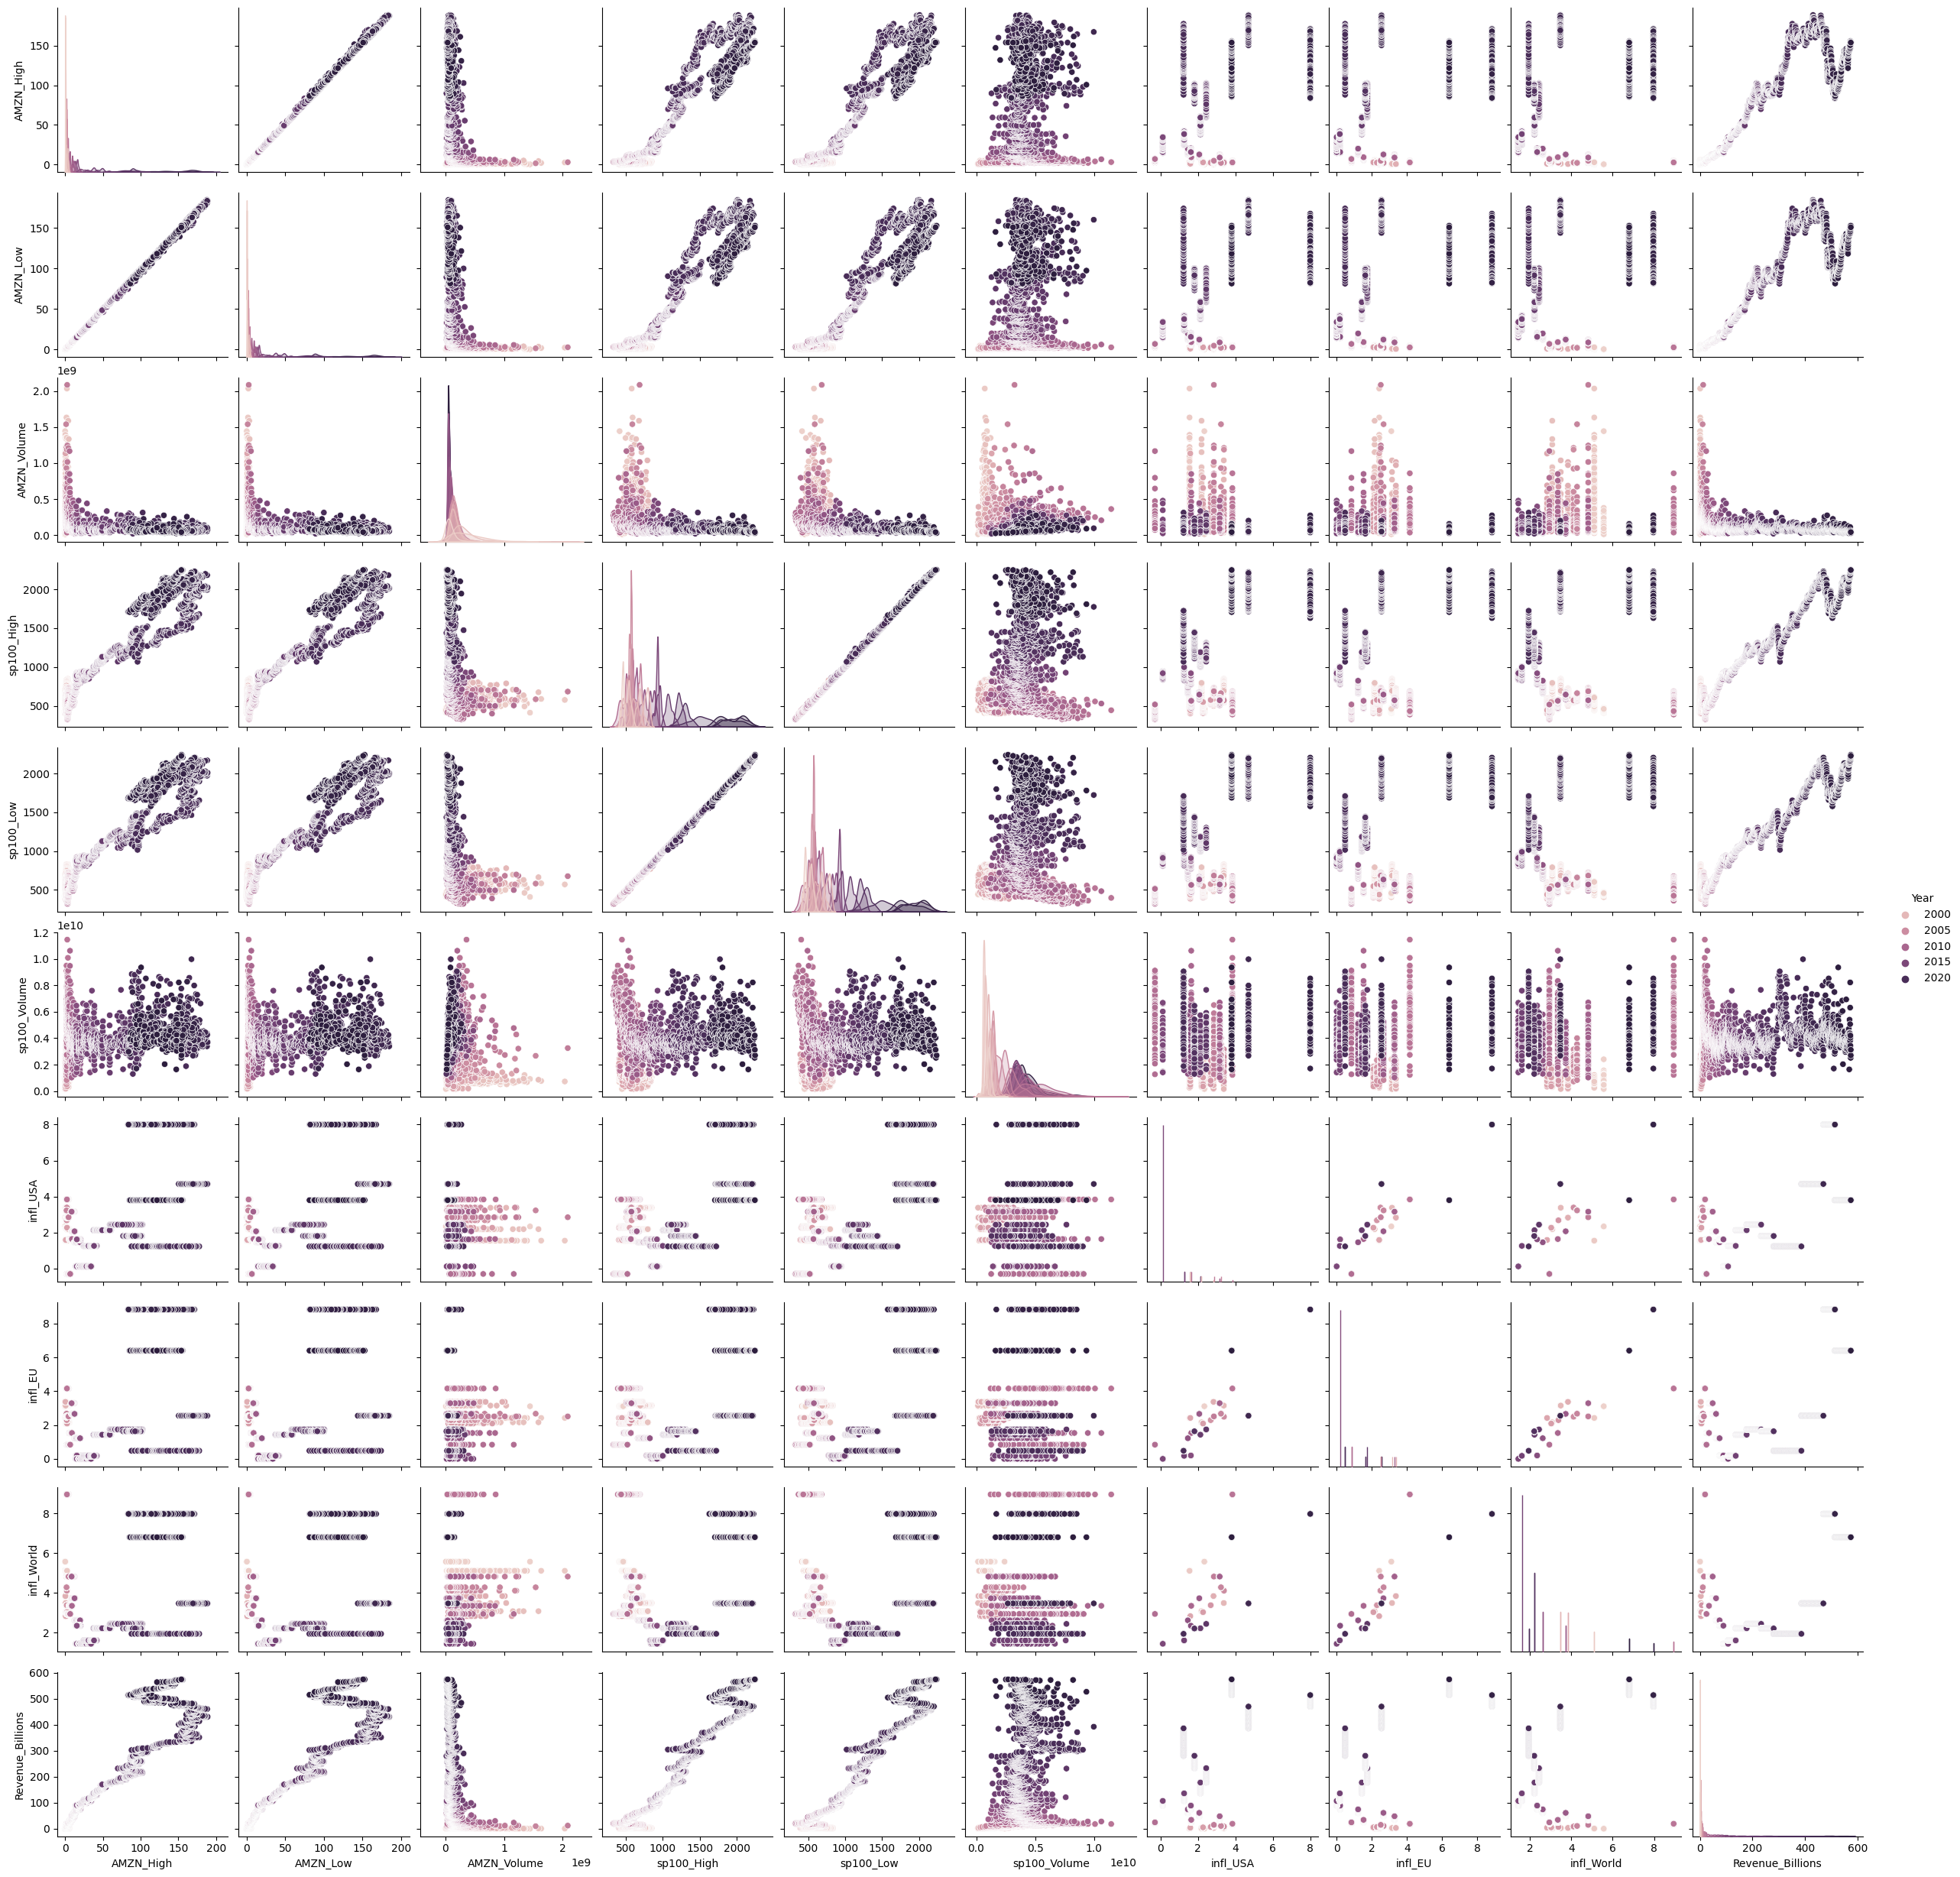

In [11]:
# plotting pairplot
# hue: str - zmienna, według której kolorujemy aspekty wykresu, np. Year
# vars: list - można wybrać zmienne, nie trzeba rysować wszystkich
names = ['AMZN_High', 'AMZN_Low', 'AMZN_Volume', 'sp100_High', 'sp100_Low', 'sp100_Volume',
        'infl_USA', 'infl_EU', 'infl_World', 'Revenue_Billions']
sns.pairplot(data, hue='Year', vars=names)
plt.show()
# nieczytelne
# wybrać mniej zmiennych
# albo podzielić je na mniejsze grupy i zrobić pairplot kilka razy

### Correlation Heatmap

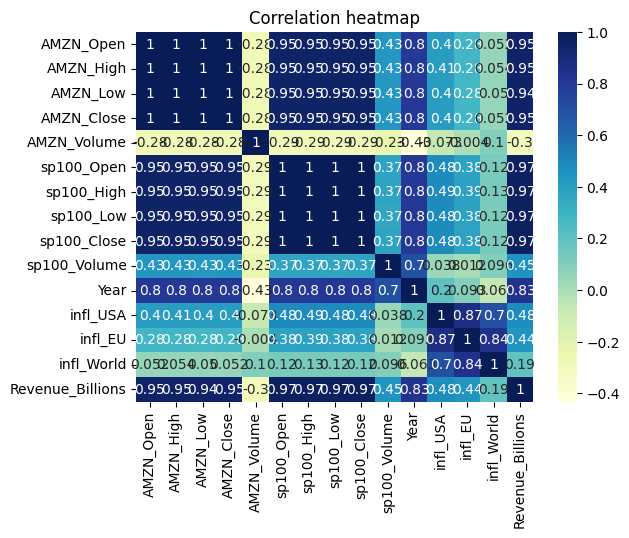

In [12]:
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.title('Correlation heatmap')
plt.show()
# nic na tym nie widać
# można spróbować pogrupować to jakoś:
# wszystkie amzn mają ze sobą korelację 1
# to samo sp100

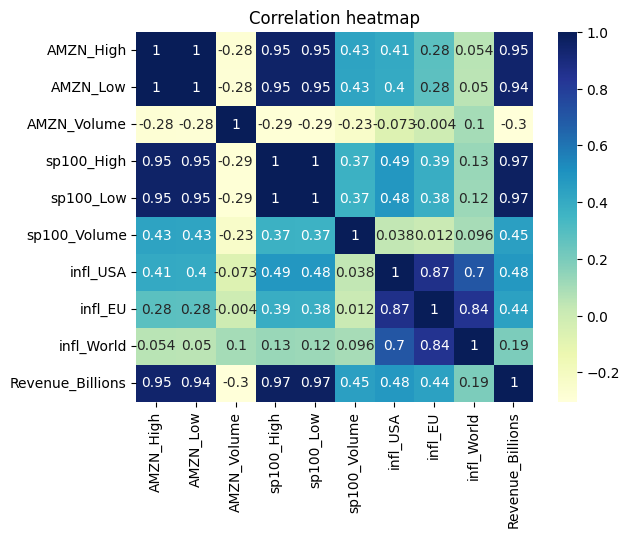

In [13]:
sns.heatmap(data[names].corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.title('Correlation heatmap')
plt.show()
# lepiej, bardziej czytelne
# wybór kolumn był przypadkowy
# można pomyśleć, które z nich faktycznie nadają się do badania korelacji
# (przeczytać co znaczą te zmienne)

### Graphs of variables versus time

# Prediction of future Amazon.com stock prices

## Linear Regression

In [14]:
# lm models

## SVM (Support Vector Machines)

In [15]:
# svm models

## Random Forest Regression

In [16]:
# rfr models

## Gradient Boosting Regressor

In [17]:
# gbr models

## LSTM (Long-Short Term Memory)

In [18]:
# lstm models

## GRU (Gated Recurrent Units)

In [19]:
# gru models

## CNN (Convolutional Neural Network)

In [20]:
# cnn models

## ARIMA (Auto-Regressive Integrated Moving Average)

In [21]:
# arima models

# Best model identification

In [22]:
# the best model is: (to be continued...)

# Real-time data model application

In [23]:
# application of the best model to the real time data (january-may 2024)

# What does the future hold...?

In [24]:
# prediction for the next 2 years